In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np

import PIL
import pathlib
import cv2
import tensorflow_hub as hub
from tensorflow import keras

In [ ]:
model=tf.keras.applications.mobilenet_v2.MobileNetV2()
print(type(model.name))
print(model.summary())

<class 'str'>


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

None


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
goldfish=PIL.Image.open('/content/drive/MyDrive/gold_fish.webp')

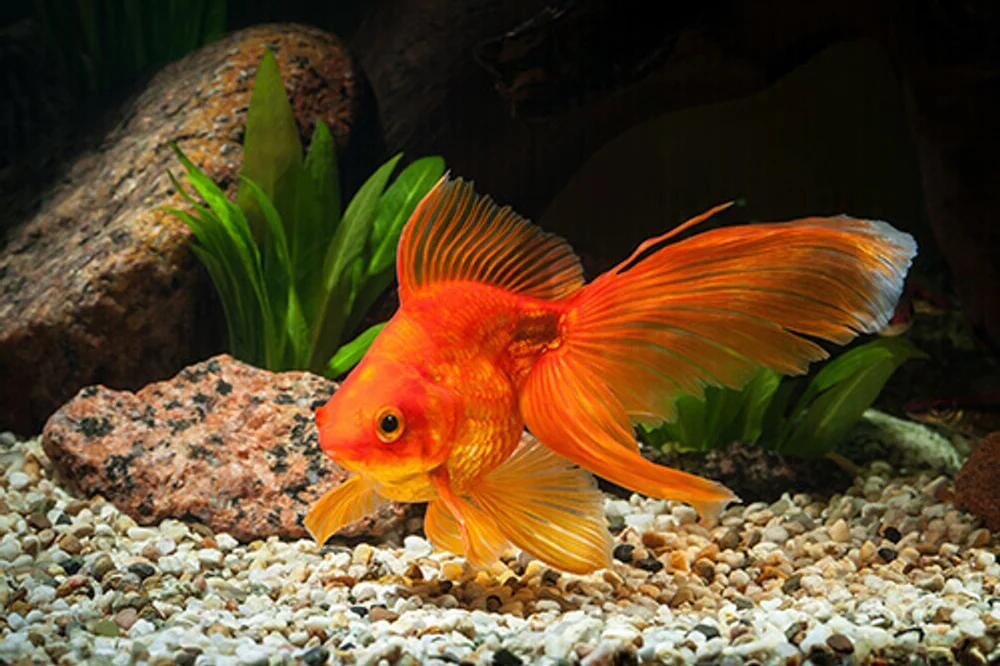

In [ ]:
goldfish

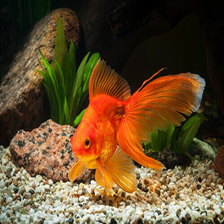

In [ ]:
goldfish=goldfish.resize((224,224))
goldfish

In [ ]:
gold_fish=np.array(goldfish)

In [ ]:
gold_fish=gold_fish/255.0

In [ ]:
gold_fish.shape,gold_fish

((224, 224, 3),
 array([[[0.00784314, 0.03529412, 0.03529412],
         [0.00784314, 0.03529412, 0.03529412],
         [0.00784314, 0.03529412, 0.03529412],
         ...,
         [0.01176471, 0.01568627, 0.00392157],
         [0.00784314, 0.01176471, 0.        ],
         [0.00784314, 0.01176471, 0.        ]],
 
        [[0.00784314, 0.03529412, 0.03529412],
         [0.00784314, 0.03529412, 0.03529412],
         [0.00784314, 0.03529412, 0.03529412],
         ...,
         [0.01176471, 0.01568627, 0.00392157],
         [0.00784314, 0.01176471, 0.        ],
         [0.00784314, 0.01176471, 0.        ]],
 
        [[0.00784314, 0.03529412, 0.03529412],
         [0.00784314, 0.03529412, 0.03529412],
         [0.00784314, 0.03529412, 0.03529412],
         ...,
         [0.01176471, 0.01568627, 0.00392157],
         [0.00784314, 0.01176471, 0.        ],
         [0.00784314, 0.01176471, 0.        ]],
 
        ...,
 
        [[0.36470588, 0.43921569, 0.4       ],
         [0.50196078, 0.5

In [ ]:
result=model.predict(gold_fish[np.newaxis,])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
result

array([[4.93148807e-04, 9.22345340e-01, 2.60441921e-05, 5.78786312e-05,
        5.22279843e-05, 2.62969814e-04, 6.13882585e-05, 4.70955594e-04,
        4.47545171e-04, 7.17798957e-06, 4.98546433e-05, 3.34799843e-05,
        1.40045391e-04, 4.66081110e-05, 2.52880018e-05, 8.04035881e-05,
        1.39272495e-04, 3.81665959e-05, 2.88112242e-05, 4.41778648e-05,
        3.93069931e-05, 2.12866526e-05, 5.14811218e-05, 4.39961041e-05,
        3.04236655e-05, 3.47835412e-05, 7.31867985e-05, 8.78987339e-05,
        2.87136827e-05, 3.68049182e-03, 3.26644913e-05, 1.59438023e-05,
        1.36481522e-05, 1.87666315e-04, 2.09014572e-04, 7.20272728e-05,
        1.16281670e-04, 3.11675467e-05, 4.48046303e-05, 1.01366779e-04,
        1.75424830e-05, 8.58916319e-05, 1.28732572e-04, 7.26266080e-05,
        1.78553782e-05, 5.09883066e-05, 1.17388809e-05, 4.64114855e-05,
        5.01214163e-05, 5.01279610e-05, 2.16501176e-05, 3.31164047e-04,
        2.78402385e-05, 3.93405971e-05, 3.18757920e-05, 1.751483

In [ ]:
predicted_result=np.argmax(result)

In [ ]:
answers=tf.keras.applications.mobilenet_v2.decode_predictions(result,top=1)

goldfish


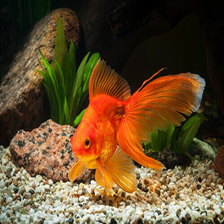

In [ ]:
for no,name,score in answers[0]:
  print(name)
goldfish